<a href="https://colab.research.google.com/github/AlexanderOntiveros/IAyRN-2001598/blob/main/%22AF7_RNP%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AF7: Redes Neuronales Artificiales**
Integrantes:

Rodrigo Alexander Ontiveros Mendez 2001598 IMC

Luis Enrique Salazar Matrón 2047932 IMC

Andrés Murguía Valencia 2173973 IMC

Diego Maltos Rodríguez 2062661 IMC

**Horario de Clase:** Martes / N4-N6 ⏰ 🍫

Conjunto de datos MNIST. MAS INFORMACION:

*   https://keras.io/api/datasets/mnist


In [195]:
#1. Importar Librerias
import tensorflow as tf #Libreria de tensor flow y keras
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import numpy as np # Librerias de ayuda
import matplotlib.pyplot as plt

In [196]:
#2. Cargar conjunto de datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

In [197]:
#Numero Etiquetas
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

| Label |

Number "0"	💯

Number "1"	🥇   

Number "2"	🥈

Number "3"	🥉

Number "4"  ⚾

Number "5"	✅

Number "6"  ♈

Number "7"	⚡

Number "8"	❌

Number "9"  ☕

In [198]:
#Explorar datos
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

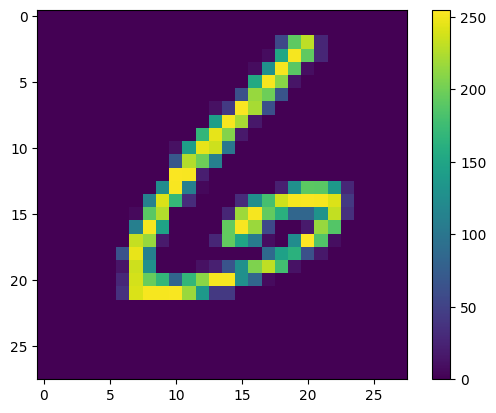

In [199]:
#3. Preprocesamiento ( Dividir los datos en conjunto de entrenamiento y prueba)
plt.figure()
plt.imshow(train_images[-2])
plt.colorbar()
plt.grid(False)
plt.show()

In [200]:
train_images = train_images / 255.0
test_images = test_images / 255.0

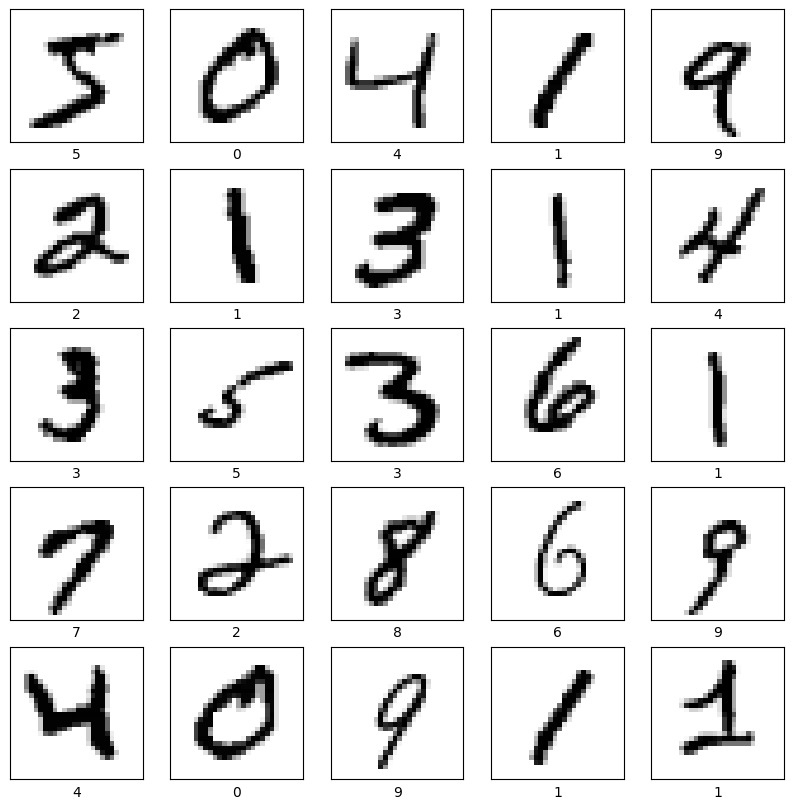

In [201]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [202]:
#4 Selección y entrenamiento del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
#Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Cargar modelo
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8763 - loss: 0.4300
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9640 - loss: 0.1219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9758 - loss: 0.0823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9835 - loss: 0.0538
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0425
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9928 - loss: 0.0249
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0215
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9958 - loss: 0.0158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9961 - loss: 0.0138


In [203]:
# Exactitud del modelo en el entrenamiento.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9817 - loss: 0.0738

Test accuracy: 0.9817000031471252


In [204]:
#5. Prueba del modelo.
#Predicciones
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[-1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [205]:
"Imprime el numero en la posicion seleccionada"
np.argmax(predictions[-1])
print(test_labels[-1])

6


In [206]:
#Grafique esto para poder ver todo el set de la prediccion de las 10 clases.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

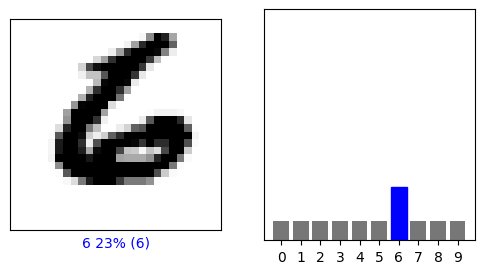

In [207]:
#Prueba del modelo.
i = -1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

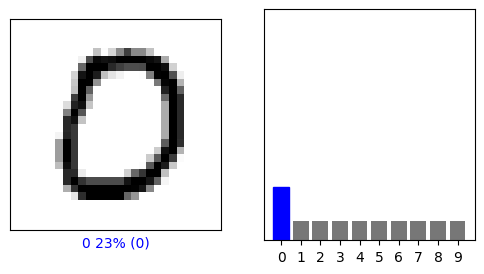

In [208]:
#Prueba del modelo.
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

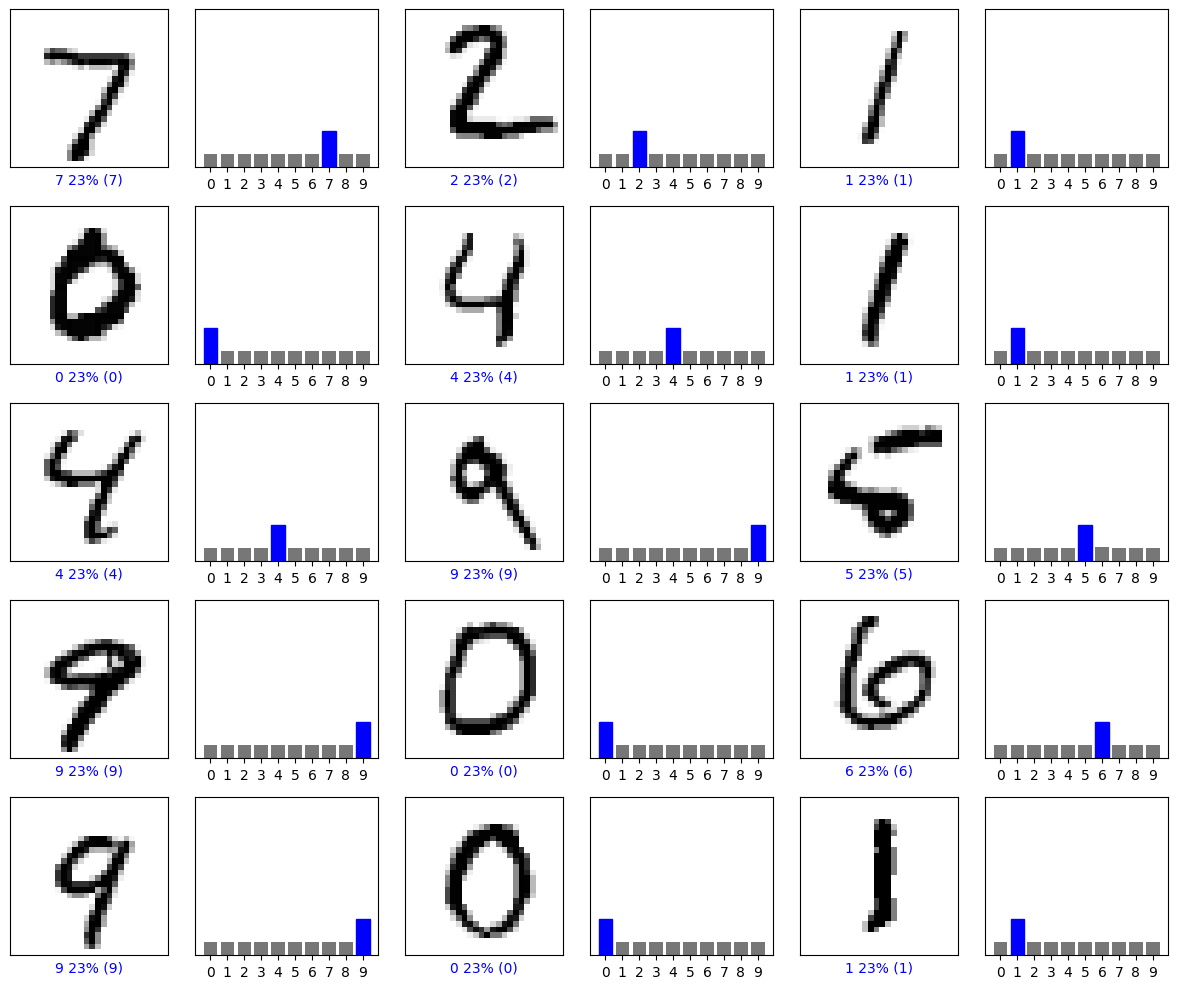

In [209]:
#Graficar multiples imagenes con sus predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [225]:
#Obtén una imagen del conjunto de datos de prueba.
img = test_images[1]

print(img.shape)

(28, 28)


In [226]:
# Agrega la imagen a un lote donde sea el único elemento.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [227]:
#Ahora predicira la etiqueta correcta para esta imagen:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[2.5213429e-09 2.7214228e-06 9.9999726e-01 1.0913678e-08 4.6845978e-19
  6.5716860e-10 1.4158506e-10 3.8395572e-15 6.0516349e-11 3.1051689e-17]]


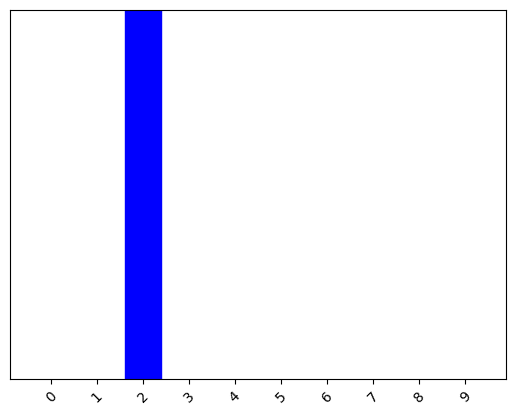

In [228]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [229]:
print(np.argmax(predictions_single[0]))

2
